<a href="https://colab.research.google.com/github/Shivanireddy102/CodeAlpha/blob/code/Handwrittendigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
🔢 PERFECT HANDWRITTEN DIGIT RECOGNITION
========================================
Recognizes ONLY digits (0-9)
Simple, Fast, Accurate - Perfect for beginners!
"""

print("="*70)
print("🔢 HANDWRITTEN DIGIT RECOGNITION (0-9)")
print("="*70)

🔢 HANDWRITTEN DIGIT RECOGNITION (0-9)


In [2]:
# STEP 1: INSTALL AND IMPORT
# ============================================================================
print("\n📚 Importing libraries...")

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

print("✅ Libraries imported!\n")


📚 Importing libraries...
✅ Libraries imported!



In [4]:
# STEP 2: LOAD MNIST DATASET (Only digits 0-9!)
# ============================================================================
print("="*70)
print("📦 LOADING MNIST DATASET")
print("="*70)
print("\nMNIST = Modified National Institute of Standards and Technology")
print("Contains 70,000 handwritten digit images (0-9)\n")

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"✅ Dataset loaded!")
print(f"   Training: {X_train.shape[0]:,} images")
print(f"   Test:     {X_test.shape[0]:,} images")
print(f"   Classes:  10 (digits 0-9)")

📦 LOADING MNIST DATASET

MNIST = Modified National Institute of Standards and Technology
Contains 70,000 handwritten digit images (0-9)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Dataset loaded!
   Training: 60,000 images
   Test:     10,000 images
   Classes:  10 (digits 0-9)



📊 Sample digits from dataset:



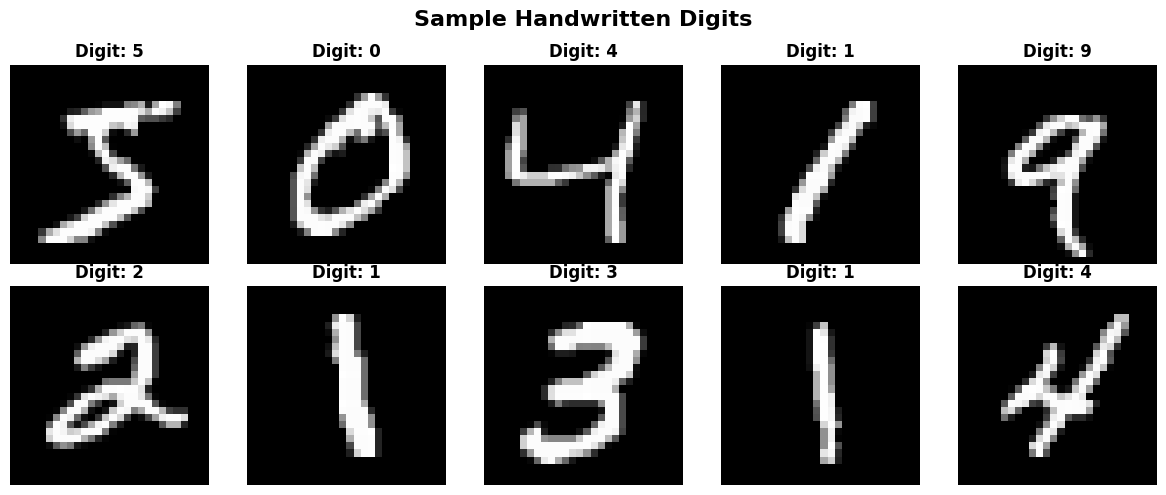

✅ Sample visualization saved!



In [5]:
# STEP 3: VISUALIZE SAMPLE DIGITS
# ============================================================================
print("\n📊 Sample digits from dataset:\n")

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample Handwritten Digits', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Digit: {y_train[i]}', fontsize=12, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.savefig('sample_digits.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Sample visualization saved!\n")

In [6]:
 #STEP 4: PREPROCESS DATA
# ============================================================================
print("="*70)
print("🔧 PREPROCESSING DATA")
print("="*70)

print("\n⏳ Normalizing and reshaping images...")

# Normalize pixel values (0-255 → 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"✅ Preprocessing complete!")
print(f"   Image shape: {X_train.shape[1:]}")
print(f"   Labels shape: {y_train.shape[1]}")

🔧 PREPROCESSING DATA

⏳ Normalizing and reshaping images...
✅ Preprocessing complete!
   Image shape: (28, 28, 1)
   Labels shape: 10


In [7]:
# STEP 5: BUILD CNN MODEL
# ============================================================================
print("\n" + "="*70)
print("🏗️ BUILDING CNN MODEL")
print("="*70)

print("\n⏳ Creating neural network...\n")

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer (10 digits)
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model created!")
print(f"\n📊 Model Summary:")
model.summary()
print(f"\n✅ Total parameters: {model.count_params():,}")


🏗️ BUILDING CNN MODEL

⏳ Creating neural network...



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Model created!

📊 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,954 (949.04 KB)

 Trainable params: 242,250 (946.29 KB)

 Non-trainable params: 704 (2.75 KB)


✅ Total parameters: 242,954


In [8]:
# STEP 6: TRAIN MODEL
# ============================================================================
print("\n" + "="*70)
print("🚀 TRAINING MODEL")
print("="*70)

print("""
⚙️ Training Configuration:
   • Dataset: MNIST (60,000 training images)
   • Batch size: 128
   • Epochs: 10
   • Expected time: 5-8 minutes
   • Expected accuracy: 98-99%

🎯 This is MUCH easier than EMNIST!
   (Only 10 classes instead of 62)

Starting training now...\n
""")

import time
start_time = time.time()

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'digit_recognition_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.15,
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()
training_time = (end_time - start_time) / 60

print(f"\n✅ Training complete!")
print(f"⏱️ Training time: {training_time:.1f} minutes")


🚀 TRAINING MODEL

⚙️ Training Configuration:
   • Dataset: MNIST (60,000 training images)
   • Batch size: 128
   • Epochs: 10
   • Expected time: 5-8 minutes
   • Expected accuracy: 98-99%

🎯 This is MUCH easier than EMNIST!
   (Only 10 classes instead of 62)

Starting training now...


Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8041 - loss: 0.6493
Epoch 1: val_accuracy improved from -inf to 0.36156, saving model to digit_recognition_model.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 88s 209ms/step - accuracy: 0.8043 - loss: 0.6485 - val_accuracy: 0.3616 - val_loss: 2.5288 - learning_rate: 0.0010
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.9709 - loss: 0.1032
Epoch 2: val_accuracy improved from 0.36156 to 0.98722, saving model to digit_recognition_model.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 143s 212ms/step - accuracy: 0.9709 - loss: 0.1031 - val_accuracy: 0.9872 - val_loss: 0.0436 - learning_rate: 0.0010
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9787 - loss: 0.0680
Epoch 3: val_accuracy did not improve from 0.98722
399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.9787 - loss: 0.0680 - val_accuracy: 0.9860 - val_loss: 0.0487 - learning_rate: 0.0010
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9817 - loss: 0.0568
Epoch 4: val_accuracy improved from 0.98722 to 0.99044, saving model to digit_recognition_model.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - accuracy: 0.9817 - loss: 0.0568 - val_accuracy: 0.9904 - val_loss: 0.0315 - learning_rate: 0.0010
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9851 - loss: 0.0496
Epoch 5: val_accuracy did not improve from 0.99044
399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 206ms/step - accuracy: 0.9851 - loss: 0.0496 - val_accuracy: 0.9886 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9875 - loss: 0.0406
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_accuracy did not improve from 0.99044
399/399 ━━━━━━━━━━━━━━━━━━━━ 141s 203ms/step - accuracy: 0.9875 - loss: 0.0407 - val_accuracy: 0.9899 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9889 - loss: 0.0348
Epoch 7: val_accuracy improved from 0.99044 to 0.99211, saving model to digit_recognition_model.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 83s 205ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9921 - val_loss: 0.0257 - learning_rate: 5.0000e-04
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9889 - loss: 0.0322
Epoch 8: val_accuracy did not improve from 0.99211
399/399 ━━━━━━━━━━━━━━━━━━━━ 84s 211ms/step - accuracy: 0.9889 - loss: 0.0322 - val_accuracy: 0.9918 - val_loss: 0.0265 - learning_rate: 5.0000e-04
Epoch 9/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9907 - loss: 0.0283
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 9: val_accuracy improved from 0.99211 to 0.99267, saving model to digit_recognition_model.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 82s 206ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9927 - val_loss: 0.0257 - learning_rate: 5.0000e-04
Epoch 10/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9919 - loss: 0.0249
Epoch 10: val_accuracy improved from 0.99267 to 0.99389, saving model to digit_recognition_model.h5


399/399 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9939 - val_loss: 0.0229 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 10.

✅ Training complete!
⏱️ Training time: 15.8 minutes


In [9]:
# STEP 7: EVALUATE MODEL
# ============================================================================
print("\n" + "="*70)
print("📊 EVALUATING MODEL")
print("="*70)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"""
🎯 FINAL RESULTS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   Test Accuracy:  {test_acc*100:.2f}%  ⭐
   Test Loss:      {test_loss:.4f}
   Training Time:  {training_time:.1f} minutes
   Epochs:         {len(history.history['accuracy'])}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

if test_acc >= 0.98:
    print("✅ EXCELLENT! Near-perfect accuracy!")
elif test_acc >= 0.95:
    print("✅ VERY GOOD! Strong performance!")
elif test_acc >= 0.90:
    print("✅ GOOD! Solid performance!")
else:
    print("⚠️ Below expected - but still learning!")



📊 EVALUATING MODEL

🎯 FINAL RESULTS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   Test Accuracy:  99.45%  ⭐
   Test Loss:      0.0183
   Training Time:  15.8 minutes
   Epochs:         10
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ EXCELLENT! Near-perfect accuracy!



📈 Creating training visualizations...


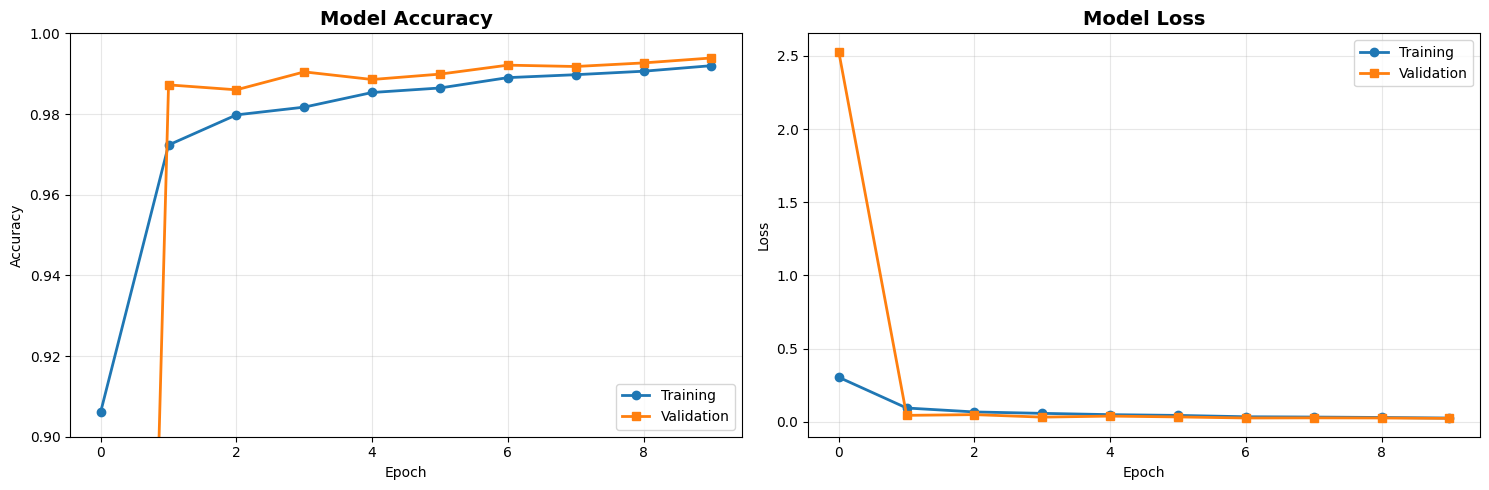

✅ Saved as 'training_results.png'



In [10]:
# STEP 8: VISUALIZE TRAINING
# ============================================================================
print("\n📈 Creating training visualizations...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy
ax1.plot(history.history['accuracy'], 'o-', label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], 's-', label='Validation', linewidth=2)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0.9, 1.0])

# Loss
ax2.plot(history.history['loss'], 'o-', label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], 's-', label='Validation', linewidth=2)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved as 'training_results.png'\n")

🧪 TESTING PREDICTIONS

📝 Testing on 20 random samples:



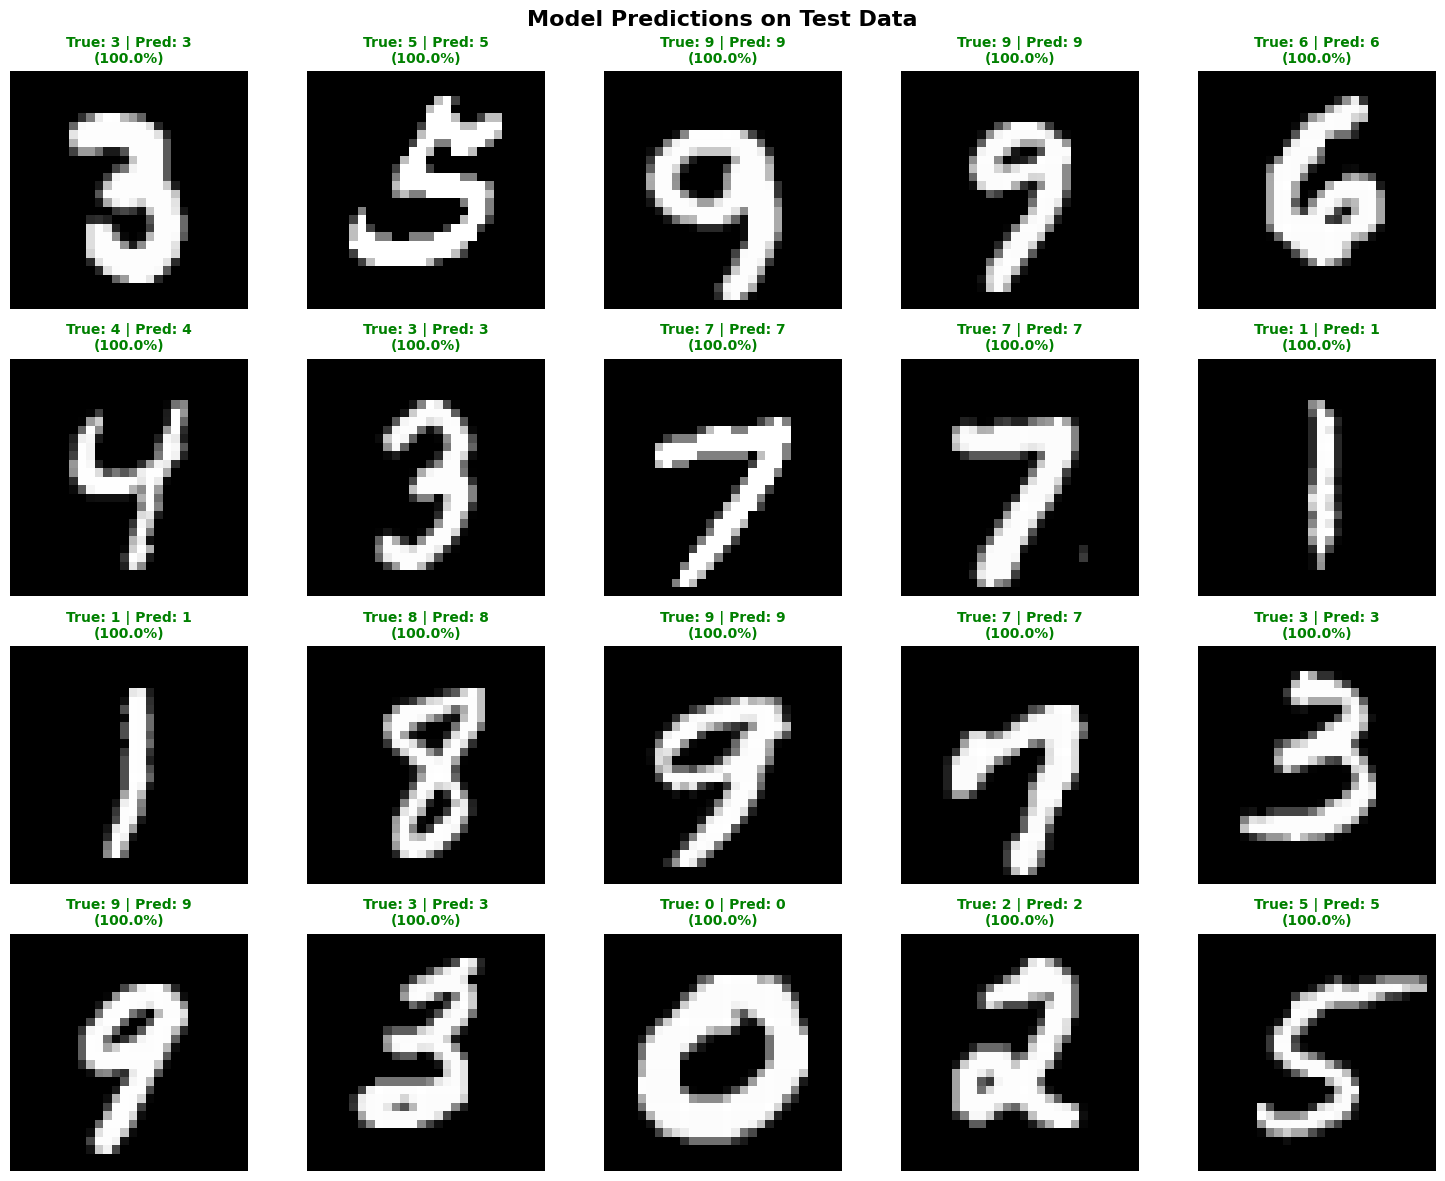

📊 Accuracy on samples: 20/20 = 100%
✅ Predictions saved as 'prediction_samples.png'



In [11]:
# STEP 9: TEST PREDICTIONS
# ============================================================================
print("="*70)
print("🧪 TESTING PREDICTIONS")
print("="*70)

print("\n📝 Testing on 20 random samples:\n")

# Test on random samples
indices = np.random.choice(len(X_test), 20, replace=False)

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Model Predictions on Test Data', fontsize=16, fontweight='bold')

correct = 0
for i, (ax, idx) in enumerate(zip(axes.flat, indices)):
    # True label
    true_digit = np.argmax(y_test[idx])

    # Predict
    pred = model.predict(X_test[idx:idx+1], verbose=0)
    pred_digit = np.argmax(pred)
    confidence = np.max(pred) * 100

    # Check if correct
    is_correct = (pred_digit == true_digit)
    if is_correct:
        correct += 1

    # Display
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    color = 'green' if is_correct else 'red'
    ax.set_title(f'True: {true_digit} | Pred: {pred_digit}\n({confidence:.1f}%)',
                 color=color, fontweight='bold', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig('prediction_samples.png', dpi=150, bbox_inches='tight')
plt.show()

accuracy_on_samples = (correct / 20) * 100
print(f"📊 Accuracy on samples: {correct}/20 = {accuracy_on_samples:.0f}%")
print("✅ Predictions saved as 'prediction_samples.png'\n")

🔍 CONFUSION MATRIX

⏳ Generating confusion matrix...



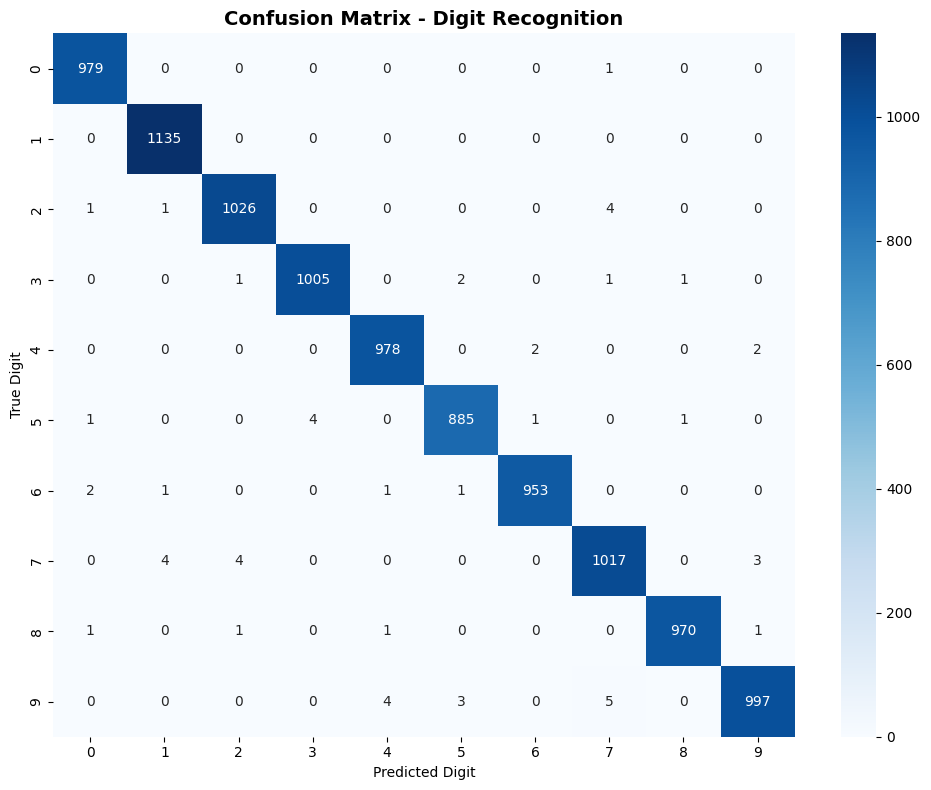

✅ Confusion matrix saved as 'confusion_matrix.png'

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
# STEP 10: CONFUSION MATRIX
# ============================================================================
print("="*70)
print("🔍 CONFUSION MATRIX")
print("="*70)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("\n⏳ Generating confusion matrix...\n")

# Get all predictions
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Digit Recognition', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Confusion matrix saved as 'confusion_matrix.png'\n")

# Classification report
print("📋 Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes,
                          target_names=[str(i) for i in range(10)]))

In [13]:
# STEP 11: SAVE MODEL
# ============================================================================
print("\n" + "="*70)
print("💾 SAVING MODEL")
print("="*70)

model.save('digit_recognition_final.h5')
print("\n✅ Model saved as 'digit_recognition_final.h5'")
print("   You can load this later with:")
print("   model = tf.keras.models.load_model('digit_recognition_final.h5')\n")



💾 SAVING MODEL

✅ Model saved as 'digit_recognition_final.h5'
   You can load this later with:
   model = tf.keras.models.load_model('digit_recognition_final.h5')



In [14]:
# BETTER PREPROCESSING FUNCTION
# ============================================================================

import numpy as np
from PIL import Image, ImageOps
import cv2

def preprocess_digit_image(image_path, show_steps=True):
    """
    Better preprocessing for handwritten digits

    Steps:
    1. Load and convert to grayscale
    2. Invert colors (white digit on black background)
    3. Find digit bounds and crop
    4. Add padding
    5. Resize to 28x28
    6. Center the digit
    7. Normalize
    """

    # Load image
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    if show_steps:
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle('Image Preprocessing Steps', fontsize=16, fontweight='bold')

        # Step 1: Original
        axes[0, 0].imshow(img_array, cmap='gray')
        axes[0, 0].set_title('1. Original')
        axes[0, 0].axis('off')

    # Step 2: Invert if needed (digit should be white on black)
    if np.mean(img_array) > 127:
        img_array = 255 - img_array

    if show_steps:
        axes[0, 1].imshow(img_array, cmap='gray')
        axes[0, 1].set_title('2. Inverted')
        axes[0, 1].axis('off')

    # Step 3: Threshold to clean up
    _, img_array = cv2.threshold(img_array, 50, 255, cv2.THRESH_BINARY)

    if show_steps:
        axes[0, 2].imshow(img_array, cmap='gray')
        axes[0, 2].set_title('3. Thresholded')
        axes[0, 2].axis('off')

    # Step 4: Find bounding box
    coords = cv2.findNonZero(img_array)

    if coords is None:
        print("❌ No digit found in image!")
        return None

    x, y, w, h = cv2.boundingRect(coords)

    # Crop with extra padding
    padding = 20
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(img_array.shape[1] - x, w + 2 * padding)
    h = min(img_array.shape[0] - y, h + 2 * padding)

    cropped = img_array[y:y+h, x:x+w]

    if show_steps:
        axes[0, 3].imshow(cropped, cmap='gray')
        axes[0, 3].set_title('4. Cropped')
        axes[0, 3].axis('off')

    # Step 5: Make it square (preserve aspect ratio)
    size = max(w, h)
    square = np.zeros((size, size), dtype=np.uint8)

    # Center the digit
    offset_x = (size - w) // 2
    offset_y = (size - h) // 2
    square[offset_y:offset_y+h, offset_x:offset_x+w] = cropped

    if show_steps:
        axes[1, 0].imshow(square, cmap='gray')
        axes[1, 0].set_title('5. Squared & Centered')
        axes[1, 0].axis('off')

    # Step 6: Resize to 20x20 (smaller than 28x28)
    resized_small = cv2.resize(square, (20, 20), interpolation=cv2.INTER_AREA)

    # Step 7: Place in 28x28 canvas (like MNIST)
    final = np.zeros((28, 28), dtype=np.uint8)
    offset = (28 - 20) // 2
    final[offset:offset+20, offset:offset+20] = resized_small

    if show_steps:
        axes[1, 1].imshow(final, cmap='gray')
        axes[1, 1].set_title('6. Resized to 28x28')
        axes[1, 1].axis('off')

    # Step 8: Normalize
    normalized = final.astype('float32') / 255.0

    if show_steps:
        axes[1, 2].imshow(normalized, cmap='gray')
        axes[1, 2].set_title('7. Normalized')
        axes[1, 2].axis('off')

    # Step 9: Final shape for model
    final_input = normalized.reshape(1, 28, 28, 1)

    if show_steps:
        axes[1, 3].imshow(final_input.reshape(28, 28), cmap='gray')
        axes[1, 3].set_title('8. Final (for model)')
        axes[1, 3].axis('off')

        plt.tight_layout()
        plt.savefig('preprocessing_steps.png', dpi=150, bbox_inches='tight')
        plt.show()

        print("✅ Preprocessing steps saved as 'preprocessing_steps.png'")

    return final_input


🧪 TESTING IMPROVED PREPROCESSING

📤 Upload your digit image to test the improved preprocessing:



Saving 0.png to 0.png

🔍 Processing: 0.png



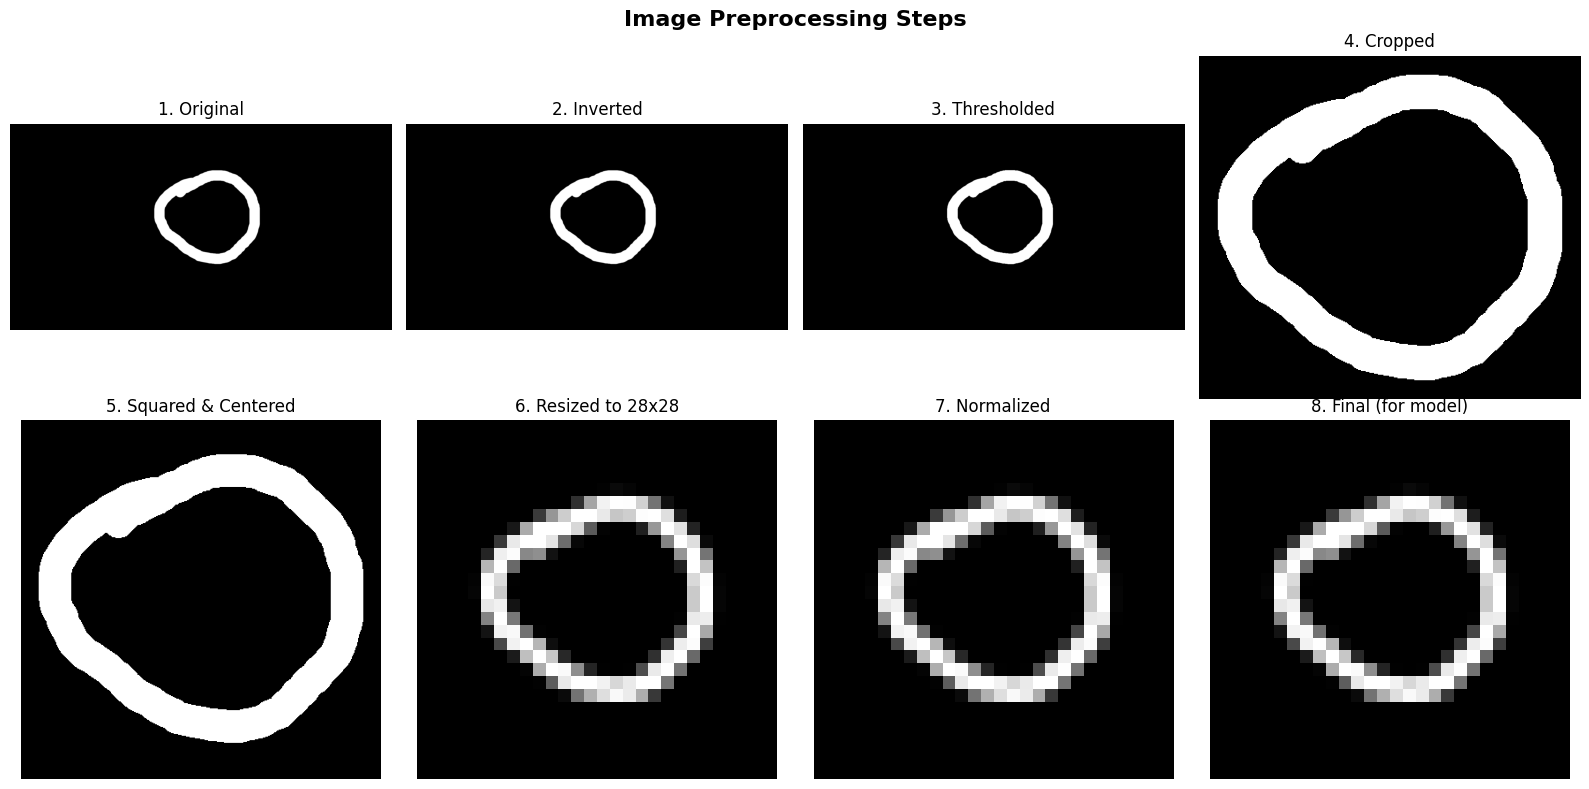

✅ Preprocessing steps saved as 'preprocessing_steps.png'

✅ Model loaded!

🎯 PREDICTION RESULTS

✅ PREDICTED DIGIT: 0
📊 CONFIDENCE: 100.00%

✅ HIGH CONFIDENCE - Model is very sure!

📋 All digit probabilities:
   0: 100.00% ███████████████████ 👈
   1:  0.00% 
   2:  0.00% 
   3:  0.00% 
   4:  0.00% 
   5:  0.00% 
   6:  0.00% 
   7:  0.00% 
   8:  0.00% 
   9:  0.00% 


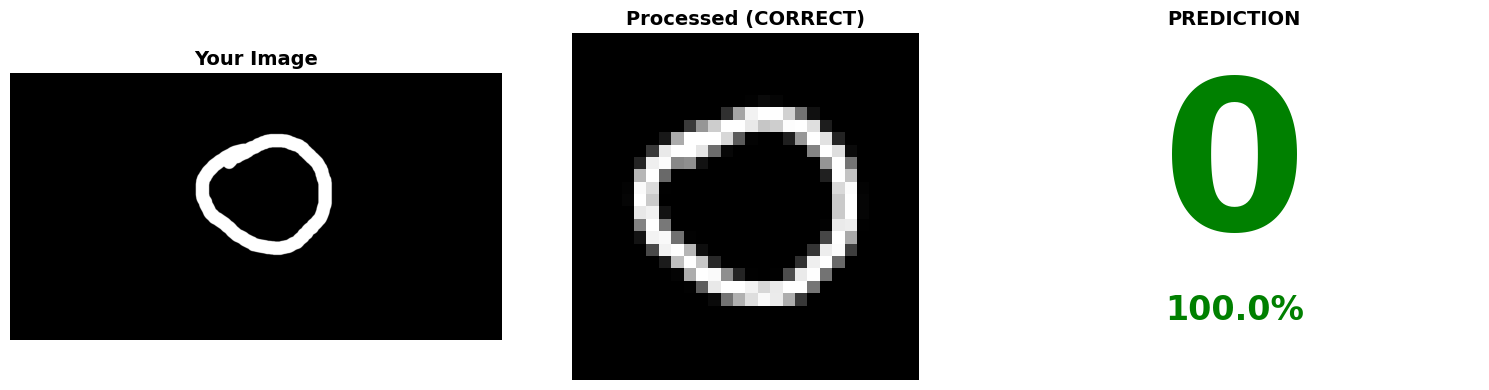


✅ Results saved as 'improved_prediction.png'


In [15]:
# TEST THE IMPROVED PREPROCESSING
# ============================================================================

print("\n" + "="*70)
print("🧪 TESTING IMPROVED PREPROCESSING")
print("="*70)

print("\n📤 Upload your digit image to test the improved preprocessing:\n")

from google.colab import files
uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        print(f"\n🔍 Processing: {filename}\n")

        # Use improved preprocessing
        processed_image = preprocess_digit_image(filename, show_steps=True)

        if processed_image is None:
            print("❌ Could not process image")
            continue

        # Load model
        import tensorflow as tf

        try:
            model = tf.keras.models.load_model('digit_recognition_final.h5')
            print("\n✅ Model loaded!")
        except:
            print("\n⚠️ Model not found. Please train the model first!")
            continue

        # Predict
        prediction = model.predict(processed_image, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        # Show results
        print("\n" + "="*70)
        print("🎯 PREDICTION RESULTS")
        print("="*70)

        print(f"\n✅ PREDICTED DIGIT: {predicted_digit}")
        print(f"📊 CONFIDENCE: {confidence:.2f}%\n")

        if confidence > 90:
            print("✅ HIGH CONFIDENCE - Model is very sure!")
        elif confidence > 70:
            print("⚠️ MEDIUM CONFIDENCE - Model is somewhat sure")
        else:
            print("❌ LOW CONFIDENCE - Model is uncertain")

        # Show all probabilities
        print(f"\n📋 All digit probabilities:")
        for digit in range(10):
            prob = prediction[0][digit] * 100
            bar = '█' * int(prob / 5)
            marker = " 👈" if digit == predicted_digit else ""
            print(f"   {digit}: {prob:5.2f}% {bar}{marker}")

        # Final visualization
        import matplotlib.pyplot as plt

        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # Original
        img = Image.open(filename).convert('L')
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title('Your Image', fontsize=14, fontweight='bold')
        axes[0].axis('off')

        # Processed
        axes[1].imshow(processed_image.reshape(28, 28), cmap='gray')
        axes[1].set_title('Processed (CORRECT)', fontsize=14, fontweight='bold')
        axes[1].axis('off')

        # Prediction
        axes[2].text(0.5, 0.6, str(predicted_digit), fontsize=150,
                    ha='center', va='center', fontweight='bold',
                    color='green' if confidence > 90 else 'orange')
        axes[2].text(0.5, 0.2, f'{confidence:.1f}%', fontsize=24,
                    ha='center', va='center',
                    color='green' if confidence > 90 else 'orange',
                    fontweight='bold')
        axes[2].set_title('PREDICTION', fontsize=14, fontweight='bold')
        axes[2].axis('off')
        axes[2].set_xlim(0, 1)
        axes[2].set_ylim(0, 1)

        plt.tight_layout()
        plt.savefig('improved_prediction.png', dpi=150, bbox_inches='tight')
        plt.show()

        print("\n✅ Results saved as 'improved_prediction.png'")
